<a href="https://colab.research.google.com/github/KangaOnGit/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install contractions
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
df = pd.read_csv("/content/IMDB-Dataset.csv")
df = df.drop_duplicates()
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [20]:
stop = set(stopwords.words('english'))

def expanding_contractions(txt):
  return contractions.fix(txt)

def text_preprocessing(txt):
  w1 = WordNetLemmatizer()

  soup = BeautifulSoup(txt, 'html.parser')
  txt = soup.get_text()

  txt = expanding_contractions(txt)

  emoji_clean = re. compile ("["
  u"\ U0001F600 -\ U0001F64F " # emoticons
  u"\ U0001F300 -\ U0001F5FF " # symbols & pictographs
  u"\ U0001F680 -\ U0001F6FF " # transport & map symbol
  u"\ U0001F1E0 -\ U0001F1FF " # flags (iOS)
  u"\ U00002702 -\ U000027B0 "
  u"\ U000024C2 -\ U0001F251 "
 "]+", flags =re. UNICODE)

  txt = emoji_clean.sub(r'', txt) # Clean emojis, symbols and other miscs
  txt = re.sub(r'\.(?=\S)', '.', txt) # Add space after full stop if not for the aforementioned symbols
  txt = re.sub(r'http\S+', '', txt) # Remove urls

  # Remove punctuation
  for i in txt.lower():
    if i in string.punctuation:
      print("Puncutation Marks: ", i)
    else:
      txt = ''.join([i])

  # Lemmatization
  for i in txt.split():
    if i not in stop and i.isalpha(): # Detects if word in stopwords and is an alphabet letter
      txt = ''.join([w1.lemmatize(i)])

  return txt

df['review'].apply(text_preprocessing)

Streaming output truncated to the last 5000 lines.
Puncutate:  .
Puncutate:  -
Puncutate:  .
Puncutate:  .
Puncutate:  ,
Puncutate:  ,
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  ,
Puncutate:  .
Puncutate:  .
Puncutate:  ,
Puncutate:  .
Puncutate:  !
Puncutate:  ,
Puncutate:  .
Puncutate:  ,
Puncutate:  ,
Puncutate:  ,
Puncutate:  .
Puncutate:  ,
Puncutate:  .
Puncutate:  ,
Puncutate:  '
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  ,
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  (
Puncutate:  )
Puncutate:  .
Puncutate:  ,
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  ,
Puncutate:  ,
Puncutate:  ,
Puncutate:  ,
Puncutate:  !
Puncutate:  ,
Puncutate:  .
Puncutate:  :
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  .
Puncutate:  ,
Puncutate:  .
Puncutate:  -
Puncutate:  .
Puncutate:  '
Puncutate:  "
Puncutate:  "
Puncutate: 

<ipython-input-20-05de16202861>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(txt, 'html.parser')


Streaming output truncated to the last 5000 lines.
Puncutate:  '
Puncutate:  .
Puncutate:  ,
Puncutate:  "
Puncutate:  "
Puncutate:  ,
Puncutate:  .
Puncutate:  ,
Puncutate:  '
Puncutate:  ,
Puncutate:  '
Puncutate:  .
Puncutate:  ,
Puncutate:  .
Puncutate:  ,
Puncutate:  :
Puncutate:  ,
Puncutate:  "
Puncutate:  "
Puncutate:  ,
Puncutate:  .
Puncutate:  ,
Puncutate:  -
Puncutate:  ,
Puncutate:  ,
Puncutate:  ?
Puncutate:  ,
Puncutate:  ,
Puncutate:  ,
Puncutate:  .
Puncutate:  .
Puncutate:  (
Puncutate:  ,
Puncutate:  -
Puncutate:  ,
Puncutate:  )
Puncutate:  ,
Puncutate:  .
Puncutate:  .
Puncutate:  ,
Puncutate:  ,
Puncutate:  :
Puncutate:  .
Puncutate:  -
Puncutate:  :
Puncutate:  +
Puncutate:  /
Puncutate:  .
Puncutate:  .
Puncutate:  ,
Puncutate:  .
Puncutate:  ,
Puncutate:  .
Puncutate:  ,
Puncutate:  (
Puncutate:  ,
Puncutate:  .
Puncutate:  -
Puncutate:  *
Puncutate:  *
Puncutate:  )
Puncutate:  .
Puncutate:  ,
Puncutate:  (
Puncutate:  )
Puncutate:  '
Puncutate:  ,
Puncutate: 

,review
0,e
1,e
2,s
3,m
4,k
...,...
49995,e
49996,s
49997,y
49998,t


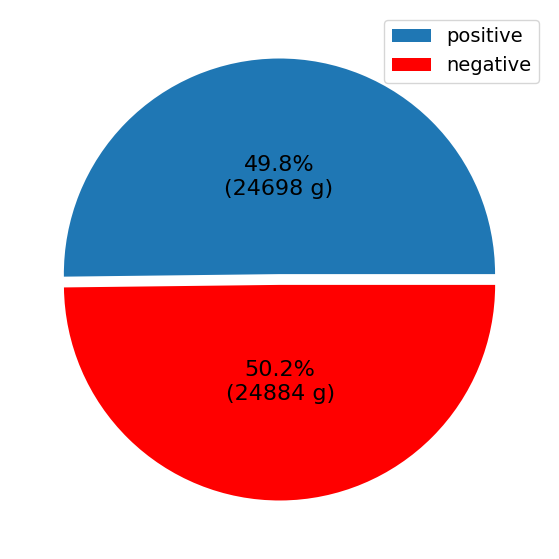

In [31]:
def func(pct, allvalues):
  absolute = int(pct/100.*np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)

freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]
labels = ['positive', 'negative']

pie, ax = plt.subplots(figsize = [11,7])

plt.pie(x = data,
        autopct = lambda pct: func(pct, data), explode = [0.025] * 2, pctdistance = -.5,
        colors = [sns.color_palette() [0], 'r'],
        textprops = {'fontsize': 16})
#title('Frequencies of Sentiment labels', fontsize = 14, fontweight = 'bold)
labels = [r'positive', r'negative']
plt.legend(labels, loc = 'best', prop = {'size': 14})
pie.savefig("PieChart.png")
plt.show()

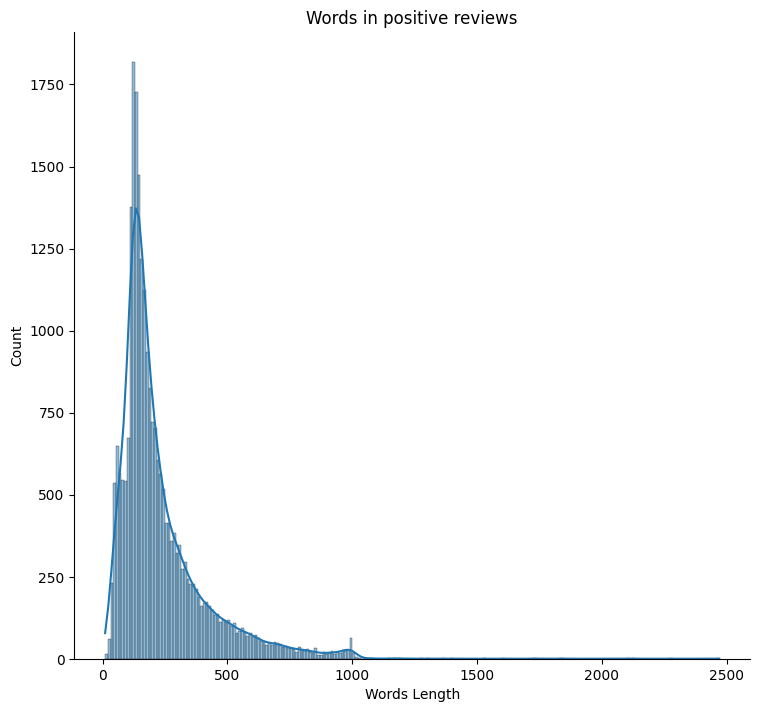

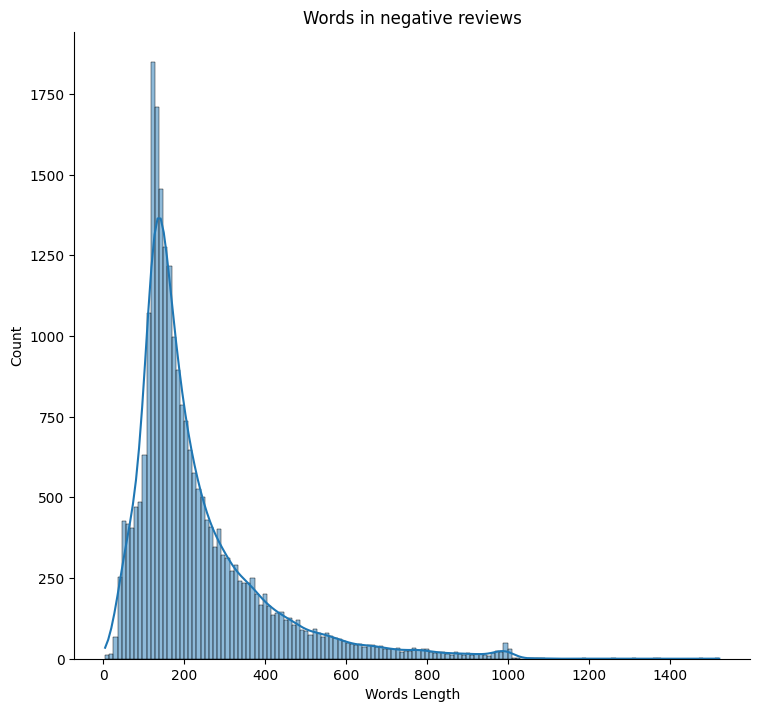

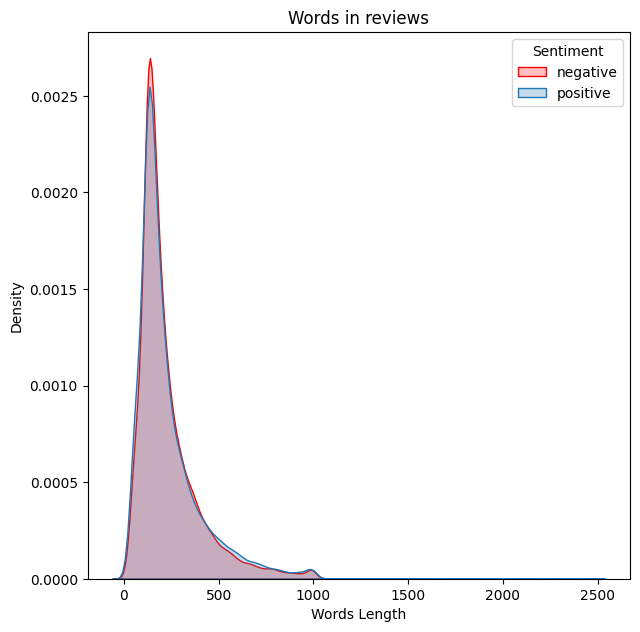

In [34]:
words_len = df['review'].str.split().map(lambda x: len(x))
df_temp = df.copy()
df_temp["Words Length"] = words_len

hist_pos = sns.displot(data = df_temp[df_temp['sentiment'] == 'positive'],
                       x = 'Words Length', hue = 'sentiment',
                       kde = True, height = 7,
                       aspect = 1.1, legend = False).set(title = 'Words in positive reviews')
plt.show(hist_pos)

hist_neg = sns.displot(data = df_temp[df_temp['sentiment'] == 'negative'],
                       x = 'Words Length', hue = 'sentiment',
                       kde = True, height = 7,
                       aspect = 1.1, legend = False).set(title = 'Words in negative reviews')
plt.show(hist_neg)

plt.figure(figsize = (7, 7.1))
kernel_distribution_number_words_plot = sns.kdeplot(data = df_temp, x = 'Words Length',
                                                    hue = 'sentiment', fill = True, palette = [sns.color_palette() [0], 'r']).set(title = 'Words in reviews')
plt.legend(title = 'Sentiment', labels = ['negative', 'positive'])
plt.show(kernel_distribution_number_words_plot)

# **Training**

---



In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [49]:
label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])
x_data = df['review']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size = 0.2, random_state= 42)

In [46]:
# Vectorize texts
tfidf_vectorizer = TfidfVectorizer(max_features  = 10000)
tfidf_vectorizer.fit(x_train, y_train)

x_train_encoded = tfidf_vectorizer.transform(x_train)
x_test_encoded = tfidf_vectorizer.transform(x_test)

# **Training & Evaluation**

---



In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [56]:
# Decision Tree
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt_classifier.fit(x_train_encoded, y_train)

y_pred = dt_classifier.predict(x_test_encoded)
accuracy_dt = accuracy_score(y_pred, y_test)

# Random Forest
rf_classifier = RandomForestClassifier(random_state = 42)
rf_classifier.fit(x_train_encoded, y_train)
y_pred = rf_classifier.predict(x_test_encoded)
accuracy_rf = accuracy_score(y_pred, y_test)

# XGBoost
xgb_model = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10) # Changed to XGBClassifier for classification
xgb_model.fit(x_train_encoded, y_train)
y_pred = xgb_model.predict(x_test_encoded)
accuracy_xgb = accuracy_score(y_pred, y_test)

# Evaluation
print("Decision Tree Accuracy: ", accuracy_dt)
print("Random Forest Accuracy: ", accuracy_rf)
print("XGBoost Accuracy: ", accuracy_xgb)

Decision Tree Accuracy:  0.7066653221740445
Random Forest Accuracy:  0.8395684178683069
XGBoost Accuracy:  0.749117676716749
